In [190]:
import os
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
from bson import ObjectId
import matplotlib.pyplot as plt
import pandas as pd

In [191]:
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client.rosen
collection = db.big_data

In [192]:
file = collection.find_one({"_id": ObjectId("65c093937aef2bc489cff1e2")}, {"_id": 1, "measuring_points": 1})

In [198]:
df = pd.DataFrame(file.get("measuring_points"))

In [200]:
df["Zeit"] = pd.to_datetime(df["timestamp"], unit="s") #convert unix timestamp to date
df = df.loc[df['magnetization'] != b'Easteregg :)'] # filter easteregg
df.head()

,defect_channel,distance,magnetization,timestamp,velocity,wall_thickness,Zeit
0,0.0,0.000000,11.541247,7.628736e+08,3.234063,6.054835,1994-03-05 13:20:17.647658706
1,0.0,0.187187,11.955974,7.628737e+08,3.219543,7.760070,1994-03-05 13:21:17.290894270
2,0.0,0.374374,13.856326,7.628737e+08,3.312151,9.300571,1994-03-05 13:22:16.934129834
3,0.0,0.561562,11.766067,7.628738e+08,3.040704,10.979558,1994-03-05 13:23:16.577365398
4,0.0,0.748749,11.024263,7.628739e+08,2.899000,7.407135,1994-03-05 13:24:16.220600963


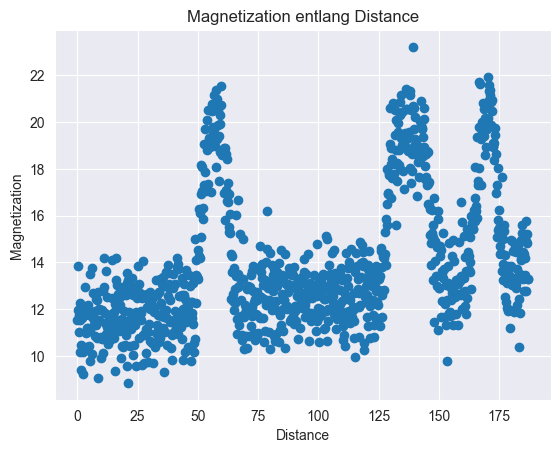

In [202]:
df.set_index("distance")
df.sort_index()
plt.plot(df['distance'], df['magnetization'], marker='o', linestyle='')
plt.xlabel('Distance')
plt.ylabel('Magnetization')
plt.title('Magnetization entlang Distance')
plt.show()